In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs
from mle_logging import load_log
from mle_toolbox.visualize import visualize_2D_grid
from visualize import imp_plot


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
def get_perf_env(transfer_log, meta_log, hyper_log):
    """Filter dataframe for environment and popsize."""
    results = {}
    id_ticket = hyper_log.filter({"imp_config/baseline_name": "sig2noise"}).run_id.iloc[0]
    id_random = hyper_log.filter({"imp_config/baseline_name": "random-reinit"}).run_id.iloc[0]
    results["ticket"] = meta_log[id_ticket].stats.final_perf
    results["random"] = meta_log[id_random].stats.final_perf
    results["transfer"] = transfer_log["b_1_eval_0"].stats.final_perf
    return results

## Ant ES Transfer

In [3]:
transfer_log = load_log("../experiments/transfer/ant_es/transfer/meta_log.hdf5", aggregate_seeds=True)
meta_log, hyper_log = load_result_logs("../experiments/transfer/ant_es/blines")

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 1950x1500 with 1 Axes>,
 <Axes: title={'center': 'Ant: Sep-CMA-ES $\\to$ DES'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

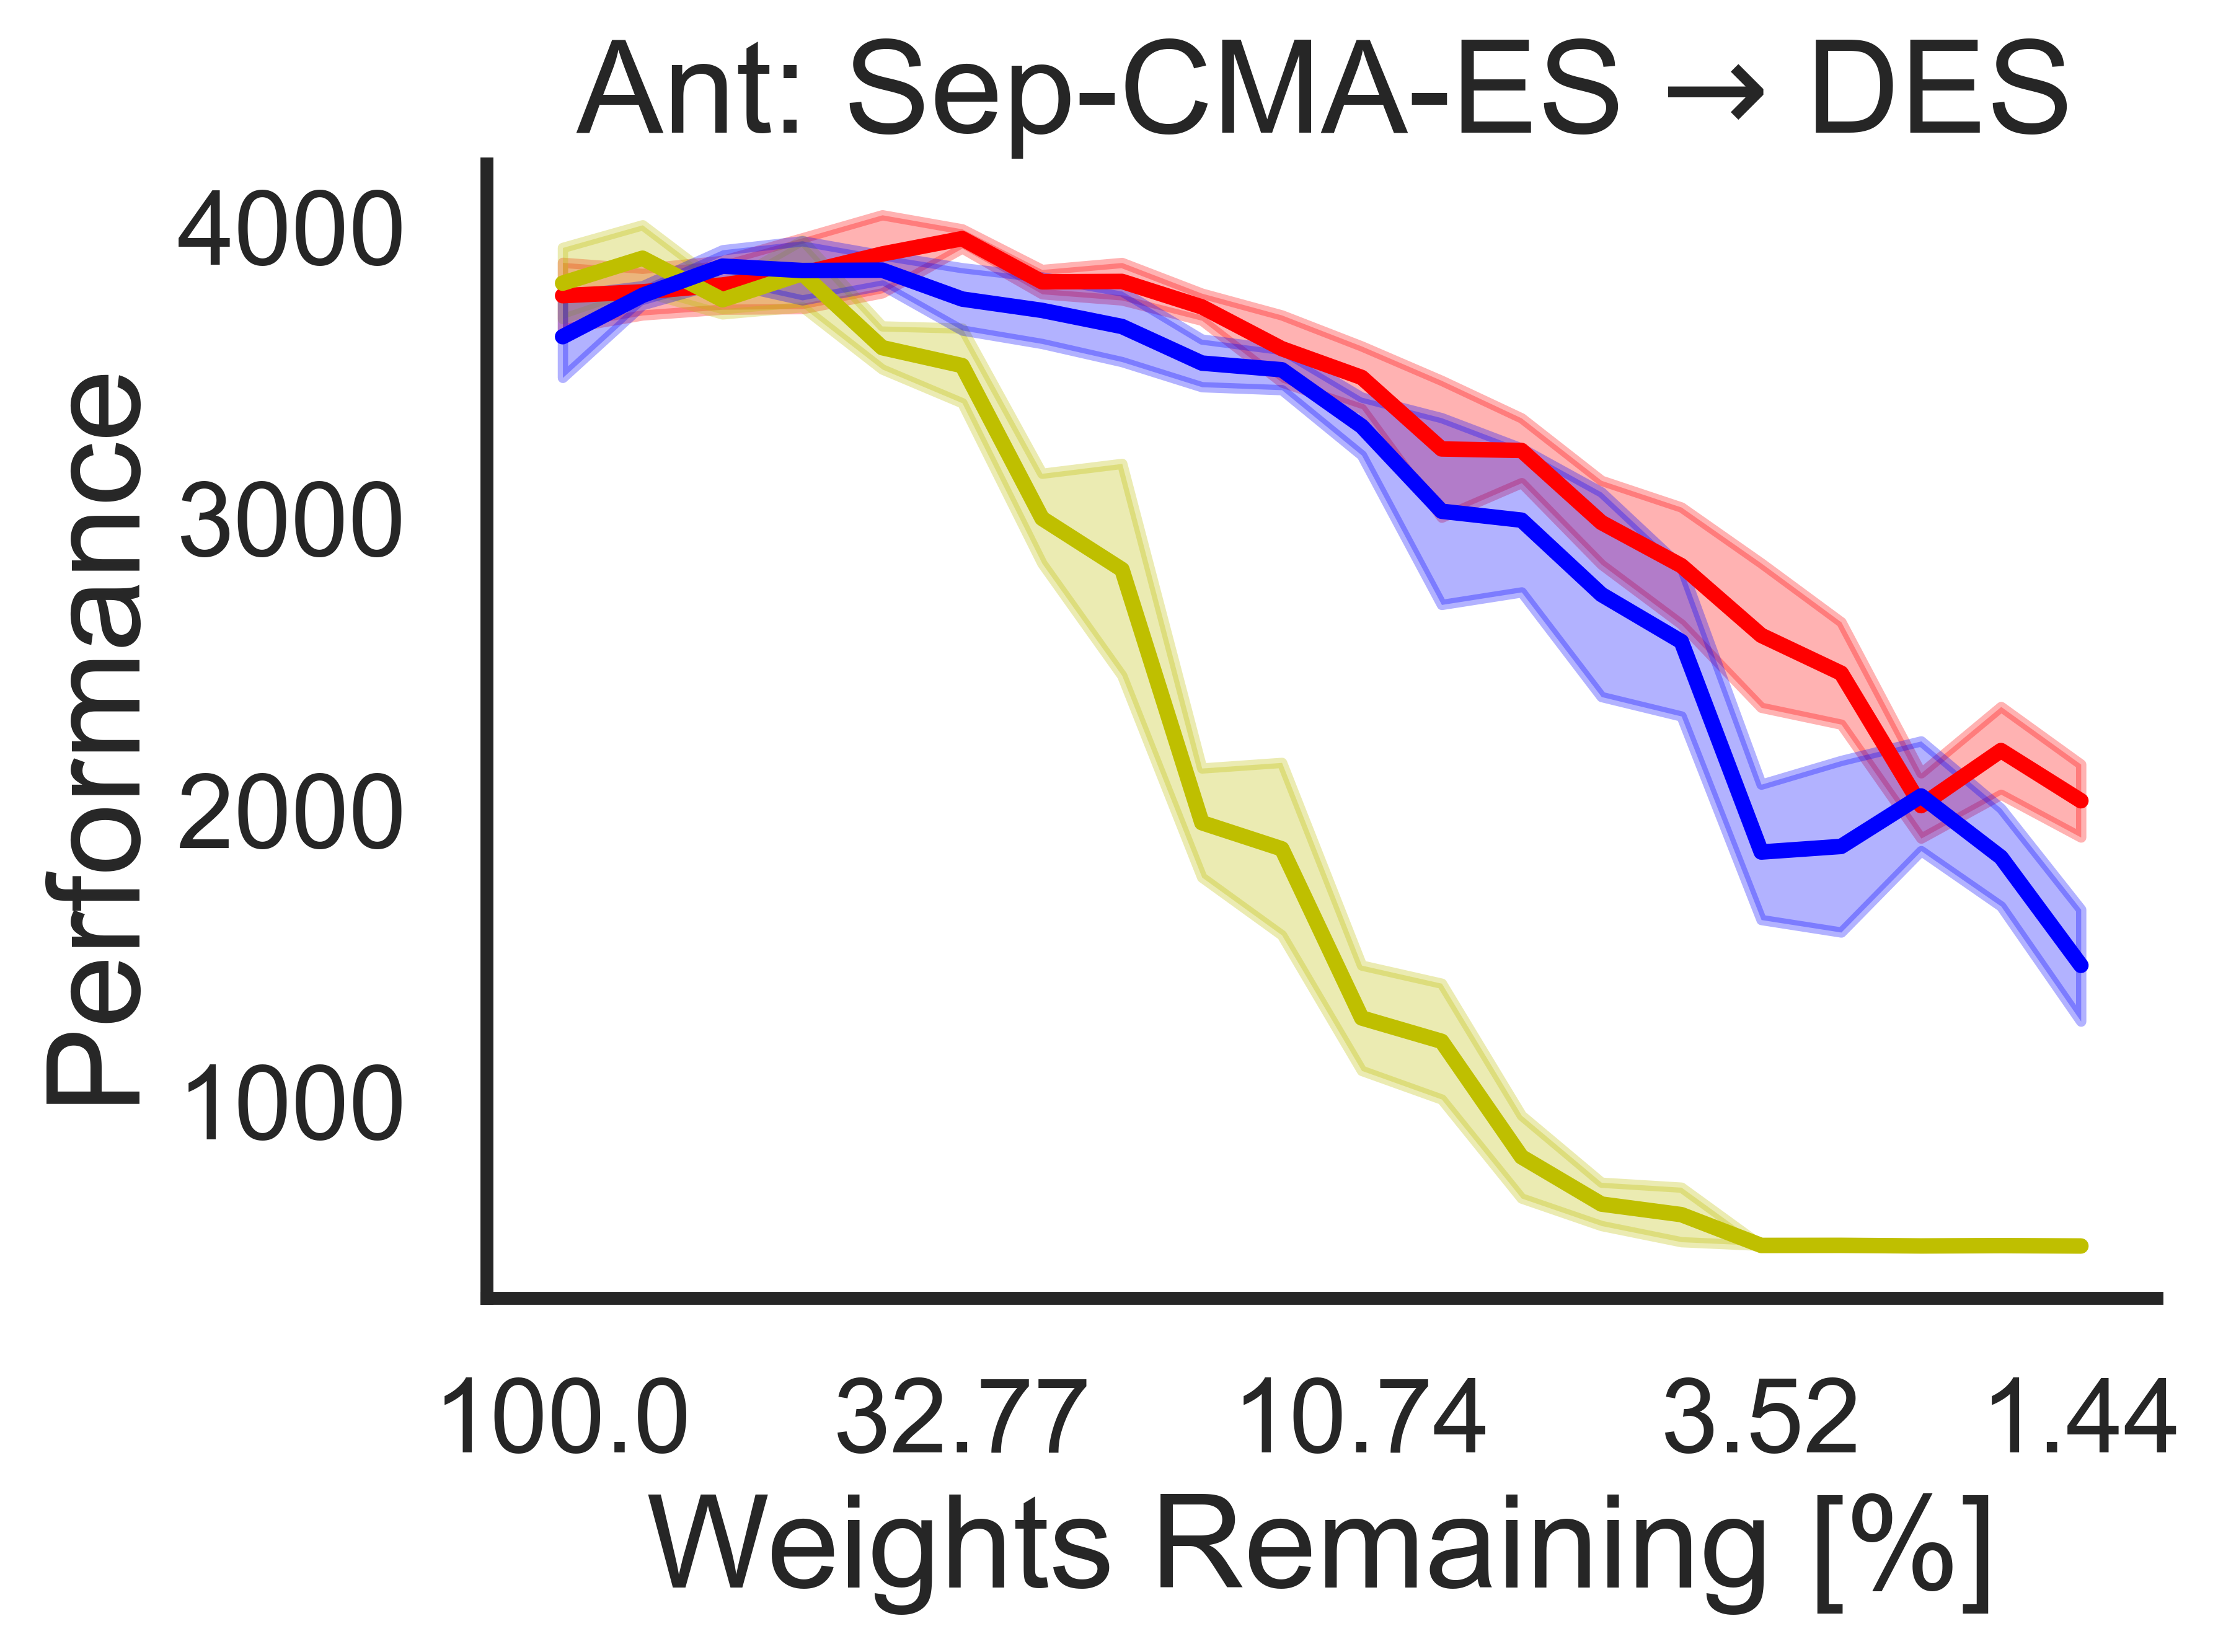

In [4]:
results = get_perf_env(transfer_log, meta_log, hyper_log)
fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["SNR", "Random", "Transfer"],
         colors=["r", "y", "b"],
         plot_title=r"Ant: Sep-CMA-ES $\to$ DES",
         plot_legend=False, plot_xlabel=True, plot_ylabel=True)

# Ant Task Transfer

In [5]:
transfer_log = load_log("../experiments/transfer/ant_task/transfer/meta_log.hdf5", aggregate_seeds=True)
meta_log, hyper_log = load_result_logs("../experiments/transfer/ant_task/blines")

[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 1950x1500 with 1 Axes>,
 <Axes: title={'center': 'Ant: Mass 10 $\\to$ Mass 15'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

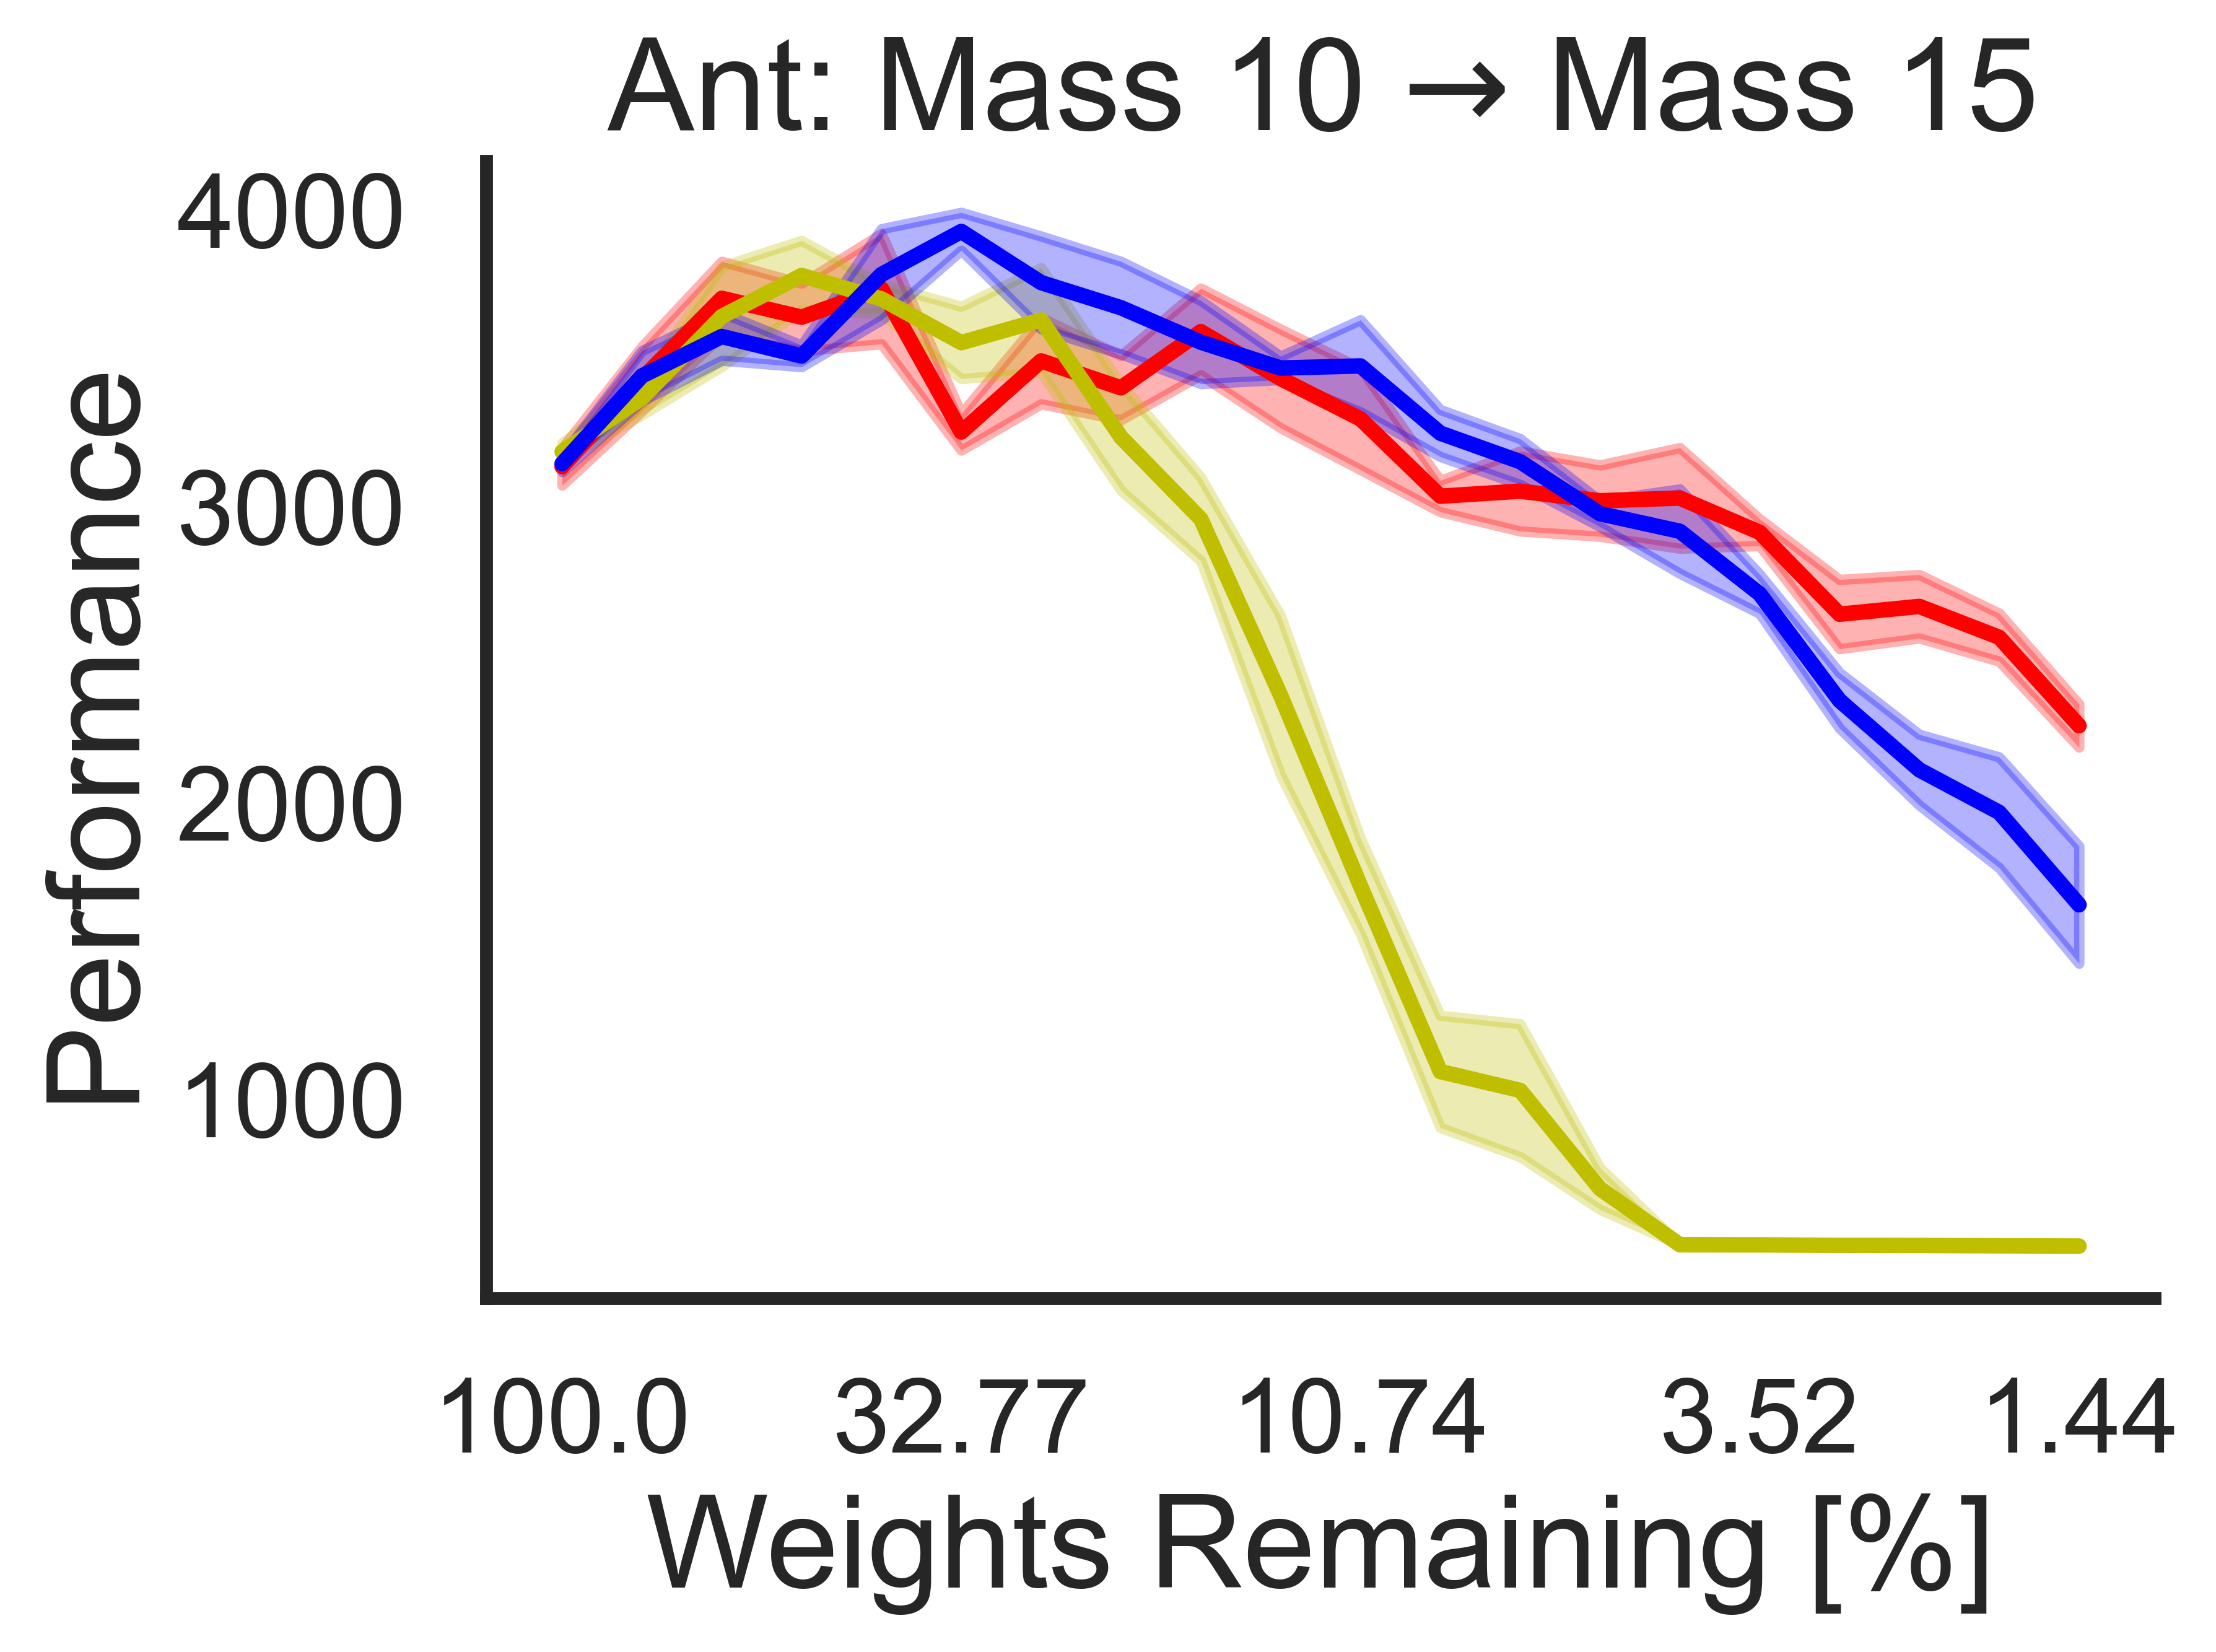

In [6]:
results = get_perf_env(transfer_log, meta_log, hyper_log)
fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["SNR", "Random", "Transfer"],
         colors=["r", "y", "b"],
         plot_title=r"Ant: Mass 10 $\to$ Mass 15",
         plot_legend=False, plot_xlabel=True, plot_ylabel=True)

## MNIST ES Transfer

In [8]:
# transfer_log = load_log("../experiments/transfer/mnist_es/transfer/meta_log.hdf5", aggregate_seeds=True)
# meta_log, hyper_log = load_result_logs("../experiments/transfer/mnist_es/blines")
transfer_log = load_log("../experiments/camera_ready/fmnist_snes_pgpe_crv/meta_log.hdf5", aggregate_seeds=True)
meta_log, hyper_log = load_result_logs("../experiments/camera_ready/fmnist_pgpe_crv")

[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 1950x1500 with 1 Axes>,
 <Axes: title={'center': 'F-MNIST: SNES $\\to$ PGPE'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

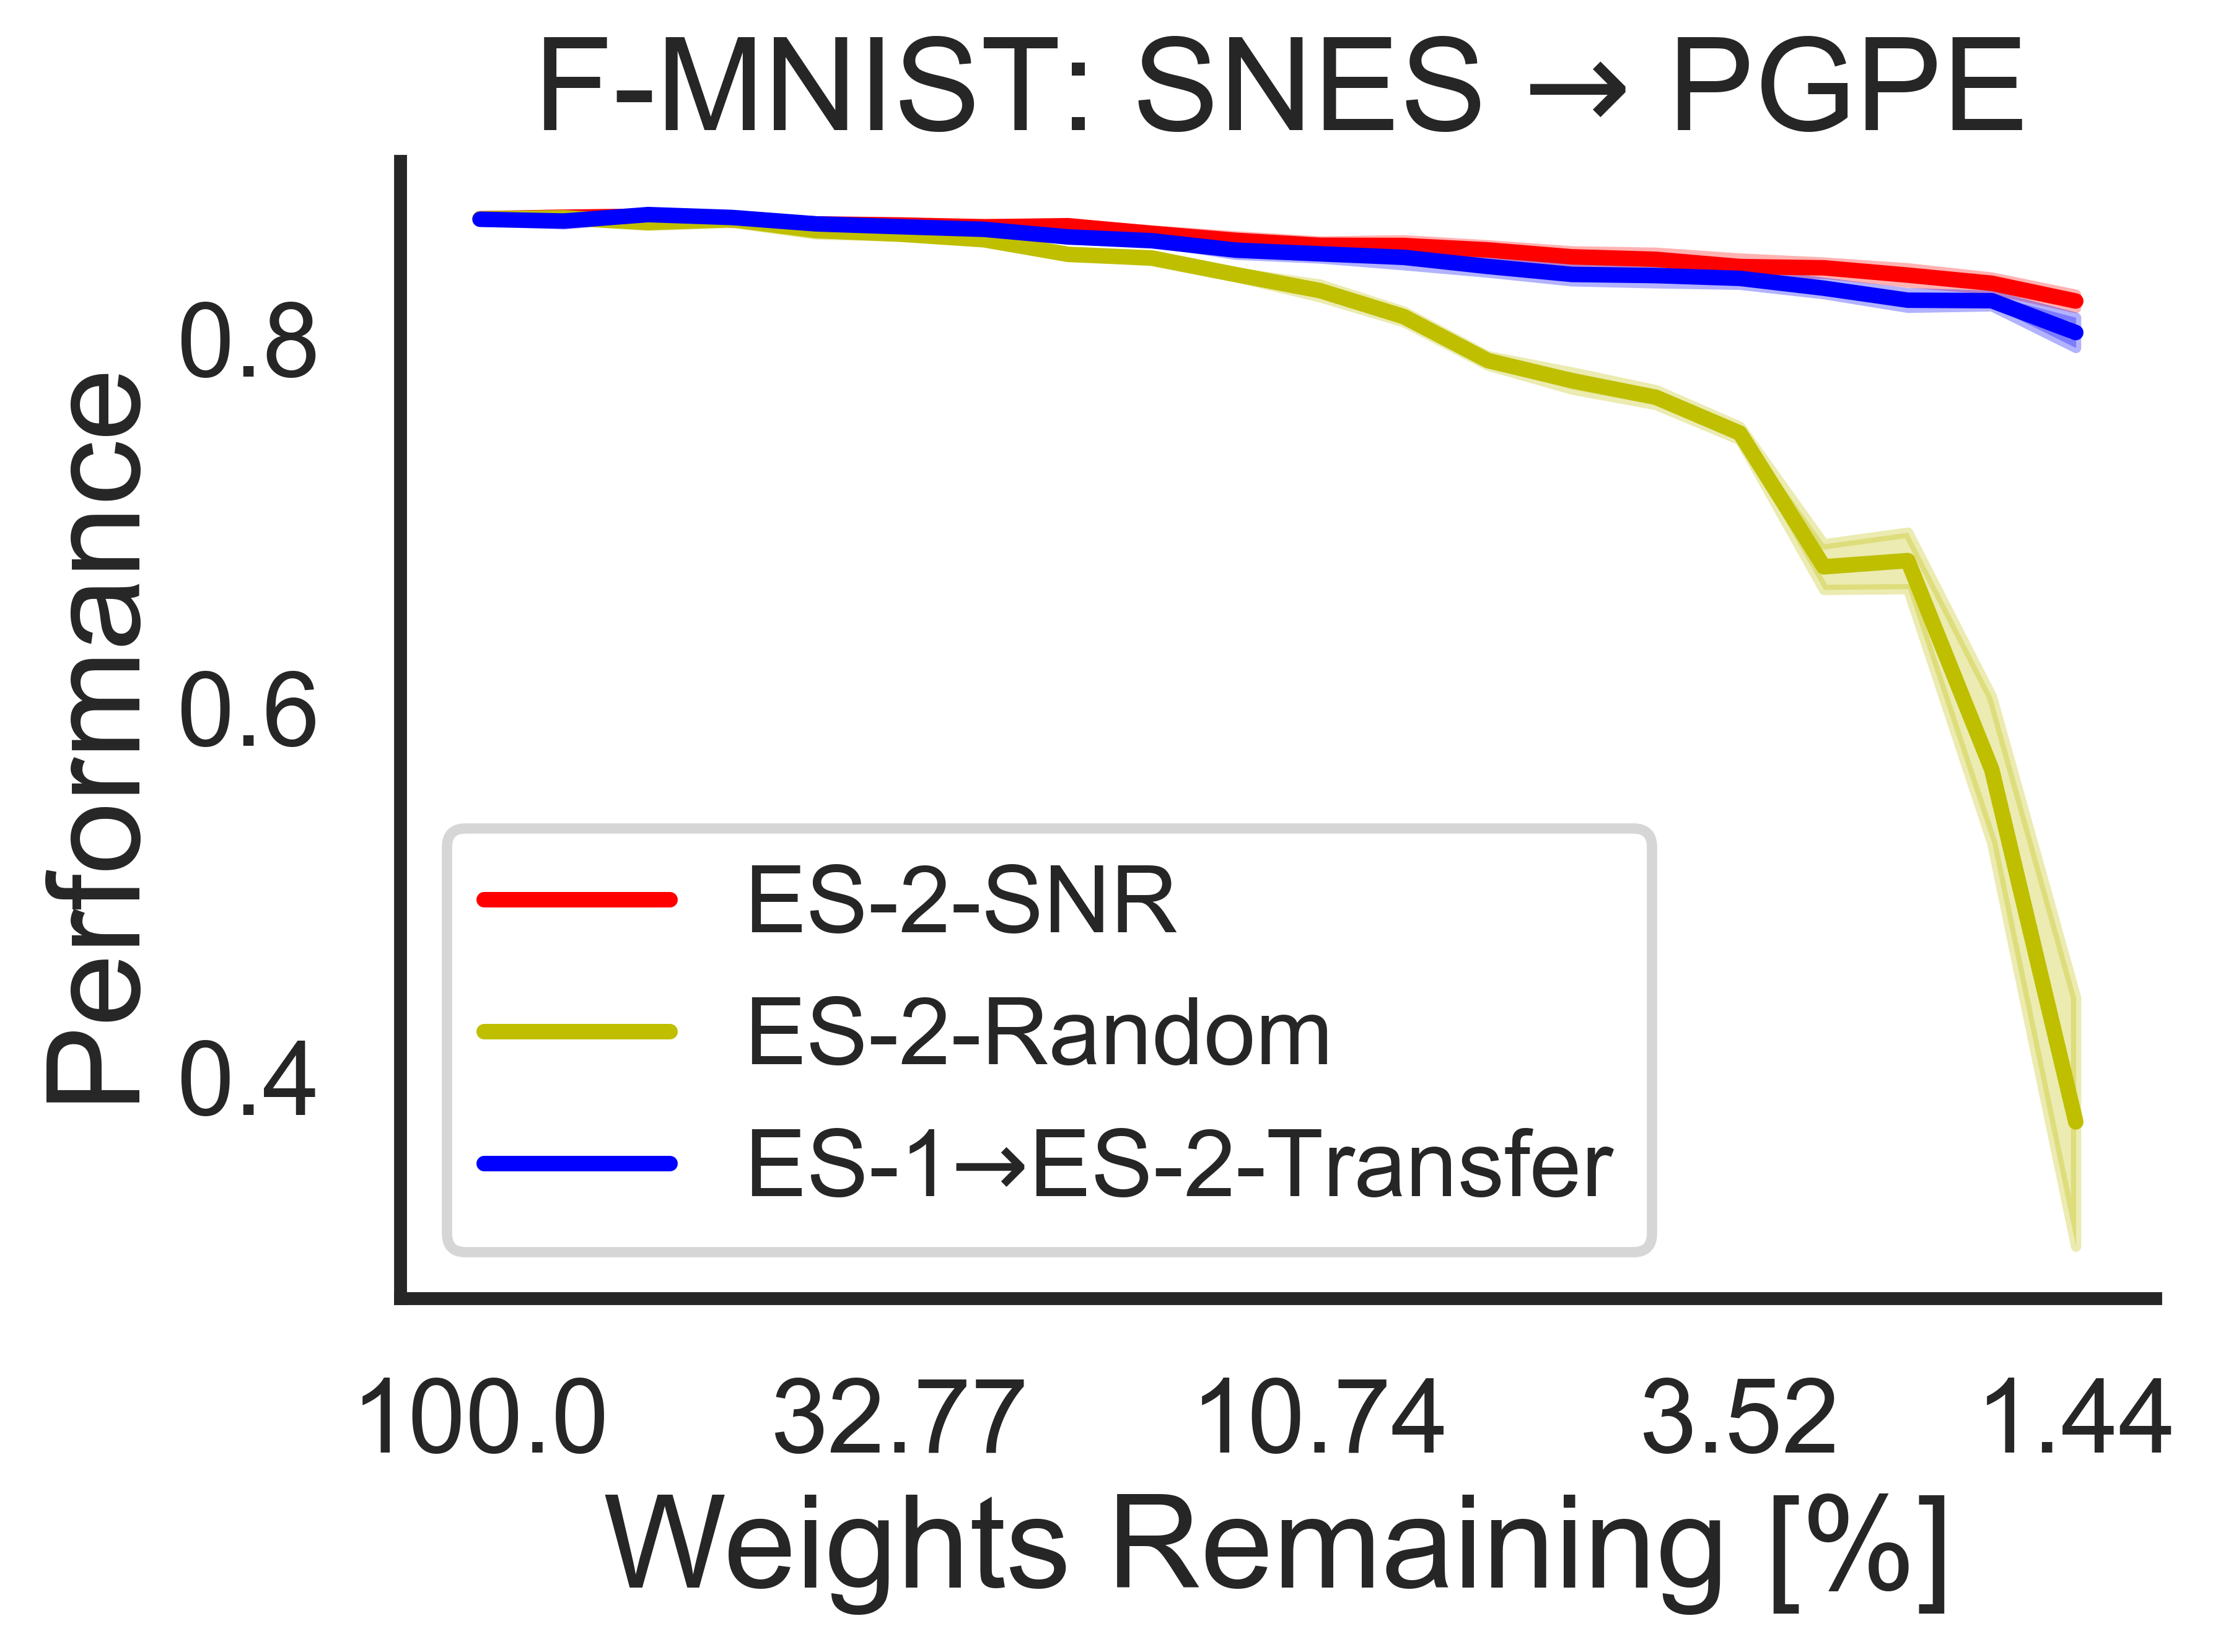

In [9]:
results = get_perf_env(transfer_log, meta_log, hyper_log)
fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["ES-2-SNR", "ES-2-Random", r"ES-1$\to$ES-2-Transfer"],
         colors=["r", "y", "b"],
         plot_title=r"F-MNIST: SNES $\to$ PGPE",
         plot_legend=True, plot_xlabel=True, plot_ylabel=True)

# MNIST Task Transfer

In [11]:
transfer_log = load_log("../experiments/transfer/mnist_task/transfer/meta_log.hdf5", aggregate_seeds=True)
meta_log, hyper_log = load_result_logs("../experiments/transfer/mnist_task/blines")

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 468x360 with 1 Axes>,
 <AxesSubplot:title={'center':'MNIST: F-MNIST $\\to$ MNIST'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

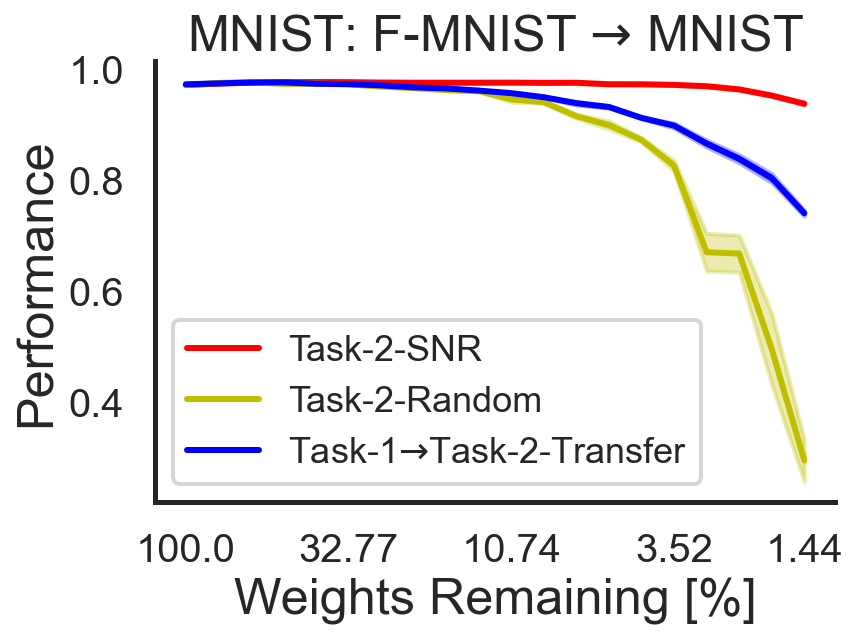

In [15]:
results = get_perf_env(transfer_log, meta_log, hyper_log)
fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["Task-2-SNR", "Task-2-Random", r"Task-1$\to$Task-2-Transfer"],
         colors=["r", "y", "b"],
         plot_title=r"MNIST: F-MNIST $\to$ MNIST",
         plot_legend=True, plot_xlabel=True, plot_ylabel=True)

# MNIST SGD Transfer

In [16]:
transfer_log = load_log("../experiments/transfer/mnist_sgd/transfer/meta_log.hdf5", aggregate_seeds=True)
meta_log, hyper_log = load_result_logs("../experiments/transfer/mnist_sgd/blines")

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [17]:
def get_perf_env(transfer_log, meta_log, hyper_log):
    """Filter dataframe for environment and popsize."""
    results = {}
    id_ticket = hyper_log.filter({"imp_config/baseline_name": "final-ticket"}).run_id.iloc[0]
    id_random = hyper_log.filter({"imp_config/baseline_name": "random-reinit"}).run_id.iloc[0]
    results["ticket"] = meta_log[id_ticket].stats.final_perf
    results["random"] = meta_log[id_random].stats.final_perf
    results["transfer"] = transfer_log["b_1_eval_0"].stats.final_perf
    return results

[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 468x360 with 1 Axes>,
 <AxesSubplot:title={'center':'F-MNIST: ES $\\to$ GD'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

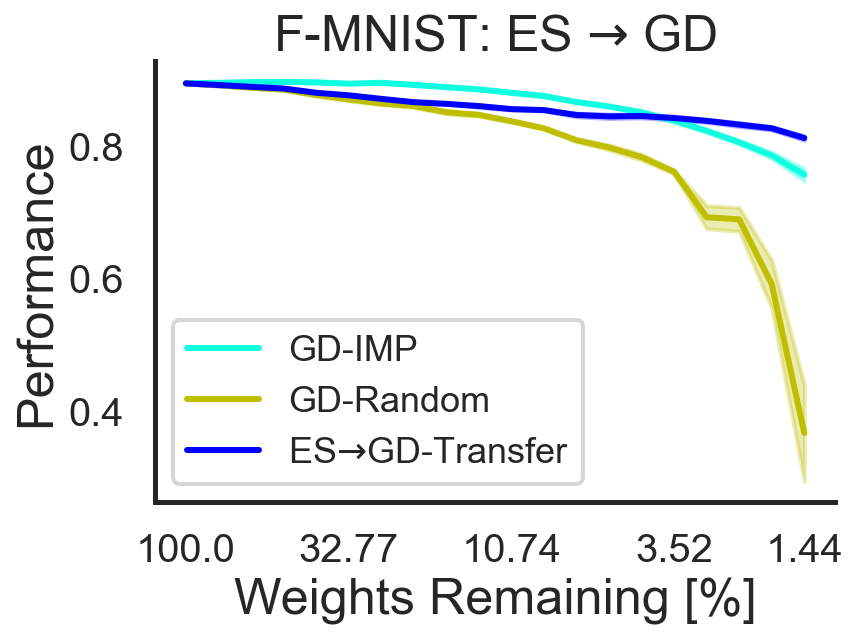

In [19]:
results = get_perf_env(transfer_log, meta_log, hyper_log)
fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["GD-IMP", "GD-Random", r"ES$\to$GD-Transfer"],
         colors=[(15/255, 255/255, 224/255), "y", "b"],
         plot_title=r"F-MNIST: ES $\to$ GD",
         plot_legend=True, plot_xlabel=True, plot_ylabel=True)

# Ant SGD Transfer

In [20]:
transfer_log = load_log("../experiments/transfer/ant_sgd/transfer/meta_log.hdf5", aggregate_seeds=True)
meta_log, hyper_log = load_result_logs("../experiments/transfer/ant_sgd/blines")

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


[100.0, 32.77, 10.74, 3.52, 1.44]


(<Figure size 468x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Ant: ES $\\to$ GD'}, xlabel='Weights Remaining [%]', ylabel='Performance'>)

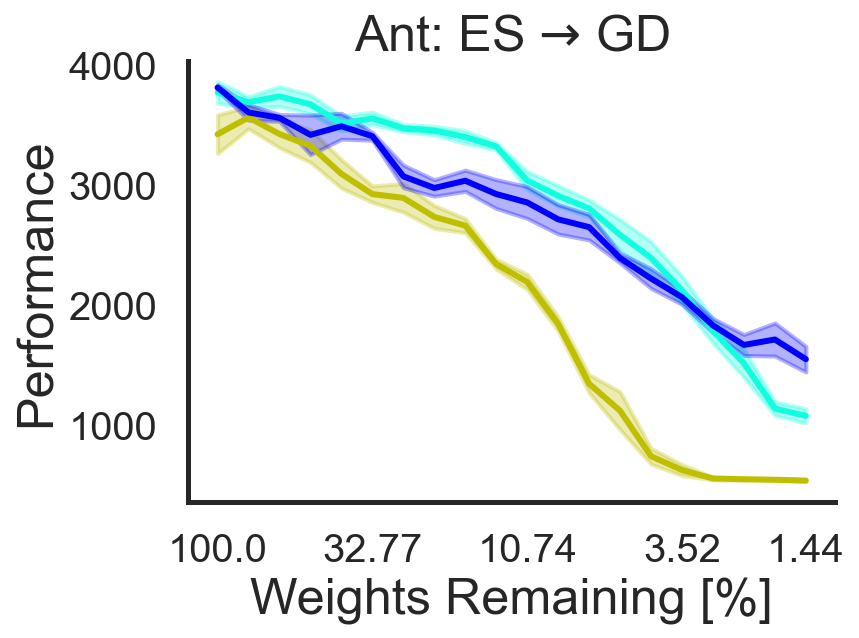

In [21]:
results = get_perf_env(transfer_log, meta_log, hyper_log)
fig, ax = plt.subplots(figsize=(6.5, 5))
imp_plot(results, fig, ax, num_imp_iters=20,
         curve_labels=["GD-IMP", "GD-Random", "Transfer"],
         colors=[(15/255, 255/255, 224/255), "y", "b"],
         plot_title=r"Ant: ES $\to$ GD",
         plot_legend=False, plot_xlabel=True, plot_ylabel=True)